In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

In [48]:
def annuity(annuity,inflation,realrate,years):
    lump = 1
    payment = lump * annuity
    for i in range(years+1):
        lump -= payment
        lump =lump*(1+realrate+inflation)
        payment = payment  * (1+inflation)
        #print(i,lump,payment)
    return lump**2

def solver(inflation,realrate,years):
    opt_result = minimize(annuity, 0.02, args=(inflation,realrate,years),method='BFGS', options={'maxiter': 5000})
    return opt_result.x[0]

years,25,26,27,28,29,30,31,32,33,34,35
realrate,,,,,,,,,,,
-5,1.92,1.79,1.68,1.57,1.47,1.38,1.30,1.22,1.15,1.08,1.02
-4,2.24,2.10,1.98,1.87,1.76,1.67,1.58,1.49,1.41,1.34,1.27
-3,2.59,2.45,2.32,2.21,2.10,1.99,1.90,1.81,1.73,1.65,1.58
-2,2.97,2.83,2.70,2.58,2.47,2.36,2.26,2.17,2.09,2.00,1.93
-1,3.39,3.25,3.12,3.00,2.88,2.77,2.67,2.58,2.49,2.41,2.33
0,3.85,3.70,3.57,3.45,3.33,3.23,3.12,3.03,2.94,2.86,2.78
1,4.33,4.19,4.06,3.94,3.82,3.72,3.62,3.52,3.44,3.35,3.28
2,4.85,4.71,4.58,4.46,4.35,4.25,4.15,4.06,3.97,3.89,3.82
3,5.39,5.26,5.13,5.02,4.91,4.81,4.72,4.63,4.55,4.47,4.40


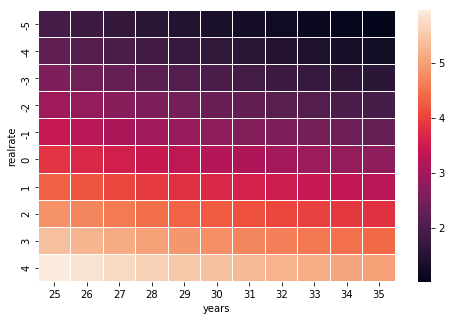

In [67]:
inflation = 0.025
result= []
for realrate in range(-5,5,1):
    for years in range(25,36,1):
        result.append([realrate,years,solver(inflation,realrate/100,years)*100])

result_df = pd.DataFrame(result,columns=["realrate","years","annuity"])
pd.options.display.float_format = '{:,.2f}'.format
pivot = pd.pivot_table(result_df,values="annuity",index="realrate",columns="years")
display(pivot)

plt.figure(figsize=(8,5))
ax = sns.heatmap(pivot, linewidth=0.01)